In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [186]:
df_train = pd.read_csv('C:/Users/jirving/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [187]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [188]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Text(0.5, 1.0, 'Log Normalized')

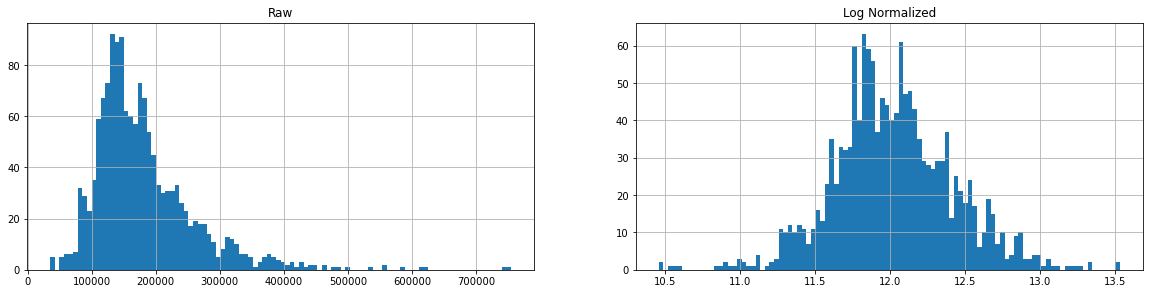

In [189]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax1 =df_train['SalePrice'].hist(bins=100)
ax1.set_title('Raw')
plt.subplot(2,2,2)
ax2 =np.log(df_train['SalePrice']).hist(bins=100)
ax2.set_title('Log Normalized')

In [190]:
df_train['SalePriceNorm'] = np.log(df_train['SalePrice'])

<AxesSubplot:xlabel='YrSold', ylabel='count'>

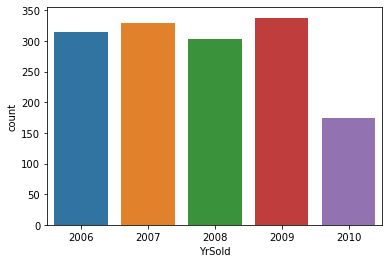

In [368]:
sns.countplot(x='YrSold',data=df_train)

Text(0.5, 1.0, 'Sale Price Over Months')

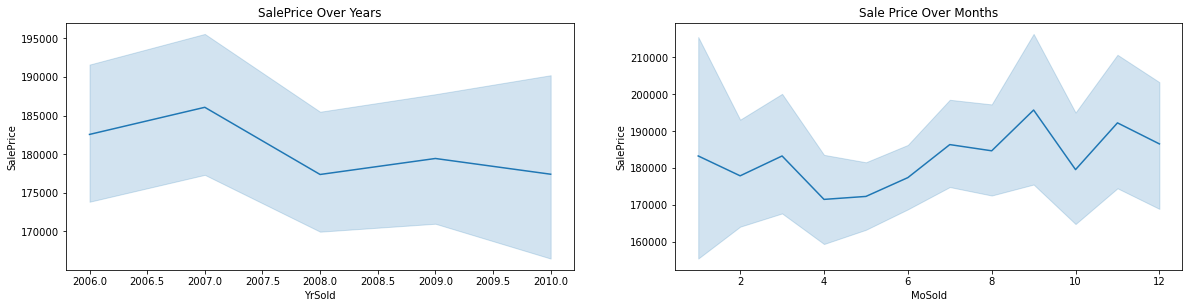

In [382]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax1 =sns.lineplot(x='YrSold', y='SalePrice',data=df_train)
ax1.set_title('SalePrice Over Years')
plt.subplot(2,2,2)
ax2 =sns.lineplot(x='MoSold', y='SalePrice',data=df_train)
ax2.set_title('Sale Price Over Months')

Text(0.5, 1.0, 'Median Sales Price by Month')

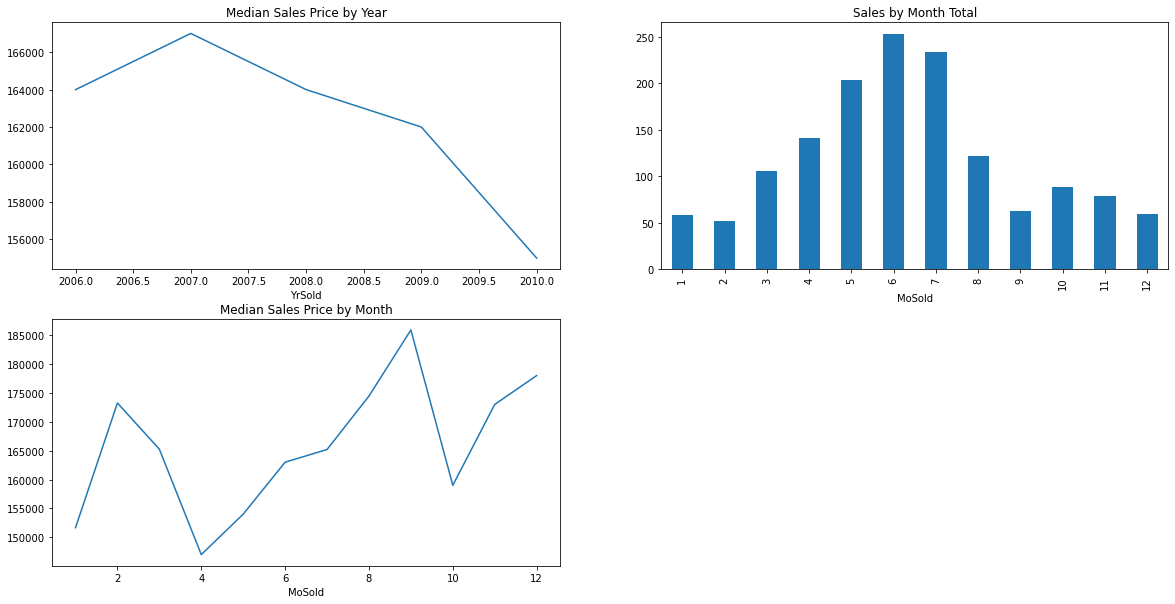

In [396]:
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax1 = df_train.groupby('YrSold').median()['SalePrice'].plot()
ax1.set_title('Median Sales Price by Year')
plt.subplot(2,2,2)
ax2 = df_train.groupby('MoSold').count()['MSSubClass'].plot(kind='bar') #some relationship between number of houses sold and sale price
ax2.set_title('Count of Sales by Month')
plt.subplot(2,2,3)
ax3 = df_train.groupby('MoSold').median()['SalePrice'].plot() #supply/demand, prices higher in winter due to lower inventory
ax3.set_title('Median Sales Price by Month')

<AxesSubplot:>

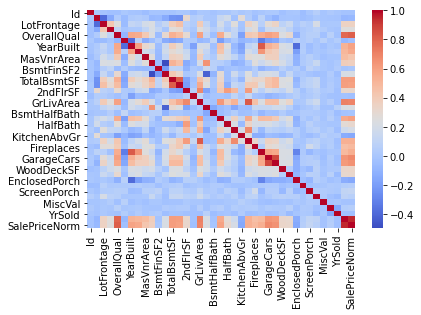

In [191]:
sns.heatmap(df_train.corr(),cmap='coolwarm')

In [192]:
df_train.set_index('Id',inplace=True)

In [193]:
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceNorm
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.355878
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.817184
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.004832


In [ ]:
#need to make MoSold and YrSold categorical variables

In [404]:
train_num = df_train.drop(['SalePrice','SalePriceNorm','YrSold', 'MoSold'],axis=1).select_dtypes(exclude='object')
train_obj = df_train.drop(['SalePrice','SalePriceNorm'],axis=1).select_dtypes(include='object')
train_dates = df_train[['YrSold', 'MoSold']]
train_obj = pd.merge(train_obj, train_dates, left_index=True,right_index=True) #add dates (year, month) back into obj df

In [405]:
df_train.corr()['SalePriceNorm']

MSSubClass      -0.073959
LotFrontage      0.355878
LotArea          0.257320
OverallQual      0.817184
OverallCond     -0.036868
YearBuilt        0.586570
YearRemodAdd     0.565608
MasVnrArea       0.430809
BsmtFinSF1       0.372023
BsmtFinSF2       0.004832
BsmtUnfSF        0.221985
TotalBsmtSF      0.612134
1stFlrSF         0.596981
2ndFlrSF         0.319300
LowQualFinSF    -0.037963
GrLivArea        0.700927
BsmtFullBath     0.236224
BsmtHalfBath    -0.005149
FullBath         0.594771
HalfBath         0.313982
BedroomAbvGr     0.209044
KitchenAbvGr    -0.147548
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
GarageYrBlt      0.541073
GarageCars       0.680625
GarageArea       0.650888
WoodDeckSF       0.334135
OpenPorchSF      0.321053
EnclosedPorch   -0.149050
3SsnPorch        0.054900
ScreenPorch      0.121208
PoolArea         0.069798
MiscVal         -0.020021
MoSold           0.057329
YrSold          -0.037263
SalePrice        0.948374
SalePriceNorm    1.000000
Name: SalePr

In [407]:
train_num.isna().sum() #check number of nan associated with each numeric variable, LotFrontage, MasVnrArea,GarageYrBlt

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

<AxesSubplot:xlabel='YearBuilt', ylabel='GarageYrBlt'>

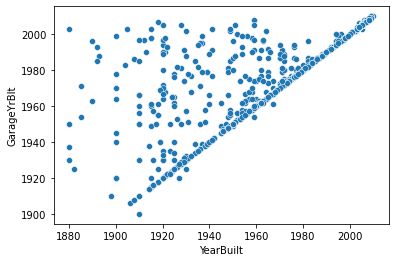

In [408]:
#check correlations that make sense
sns.scatterplot(x='YearBuilt',y='GarageYrBlt',data=train_num)

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

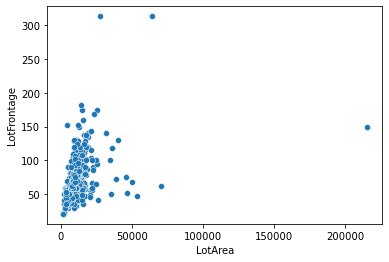

In [409]:
sns.scatterplot(x='LotArea',y='LotFrontage',data=train_num)

In [410]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [411]:
train_num[['LotArea','LotFrontage']].dropna()
X = pd.DataFrame(train_num[['LotArea','LotFrontage']].dropna()['LotArea'])
y = pd.DataFrame(train_num[['LotArea','LotFrontage']].dropna()['LotFrontage'])
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)
X_2 = pd.DataFrame(train_num['LotArea'])
X_pred = lm.predict(X_2)
train_num['LotFrontage_Pred']=X_pred

[[0.0013058]]
[57.05504248]


In [412]:
#imputations for each numeric variable where data is missing
train_num['GarageYrBlt'].fillna(train_num['YearBuilt'],inplace=True) #set GarageYrBlt to YearBuilt for house, generally the same
train_num['LotFrontage'].fillna(train_num['LotFrontage_Pred'],inplace=True)#set LotFrontage to linear regression prediction from LotArea

In [413]:
train_num['MasVnrArea'].median()

0.0

In [414]:
train_num['MasVnrArea'].fillna(0,inplace=True) #fill with median value

In [415]:
train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage_Pred
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2,548,0,61,0,0,0,0,0,68.089042
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,2,460,298,0,0,0,0,0,0,69.590711
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2,608,0,42,0,0,0,0,0,71.745279
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,3,642,0,35,272,0,0,0,0,69.525421
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,3,836,192,84,0,0,0,0,0,75.675733


In [416]:
train_num.isna().sum() #check number of nan associated with each numeric variable, LotFrontage, MasVnrArea,GarageYrBlt, NaN are now gone

MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
LotFrontage_Pred    0
dtype: int64

In [417]:
#scale numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [418]:
scaler.fit(train_num)
train_numscal = pd.DataFrame(scaler.transform(train_num),columns=train_num.columns,index=df_train.index)

In [419]:
train_numscal #standardized numeric data, Id is 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage_Pred
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.243181,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.207142
2,-0.872563,0.387050,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.091886
3,0.073375,-0.117135,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.073480
4,0.309859,-0.453259,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-0.096897
5,0.073375,0.555112,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.375148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.073375,-0.369228,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.260560
1457,-0.872563,0.597128,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.266407
1458,0.309859,-0.201166,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.147810


In [420]:
#Let's use PCA to reduce dimensionality of the dataset
from sklearn.decomposition import PCA

In [421]:
pca = PCA(n_components=4)

In [422]:
y=df_train['SalePriceNorm']
pca.fit(train_numscal)

PCA(n_components=4)

In [424]:
train_pca = pd.DataFrame(pca.transform(train_numscal),columns=['V1','V2','V3','V4'],index=df_train.index)
train_pca

,V1,V2,V3,V4
Id,,,,
1,1.425998,0.572432,-1.657209,-1.883677
2,0.015605,-1.157684,0.943348,-0.039478
3,1.607697,0.333589,-1.316187,-1.433611
4,-0.343780,0.957321,0.563085,-0.183344
5,4.346807,1.174418,-0.520681,-1.495733
...,...,...,...,...
1456,0.725758,1.435418,-1.787139,0.438932
1457,2.463299,-1.671144,1.708338,0.307233
1458,0.488743,3.345129,1.474290,0.102162


In [425]:
pca.explained_variance_.round(2)

array([7.31, 3.24, 2.99, 2.01])

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
#Check regression on PC's alone
X = train_pca
y = df_train['SalePriceNorm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [428]:
pca_linreg = LinearRegression()

In [429]:
pca_linreg.fit(X_train,y_train)

LinearRegression()

In [430]:
linreg_pred = pca_linreg.predict(X_test)

<AxesSubplot:xlabel='SalePriceNorm'>

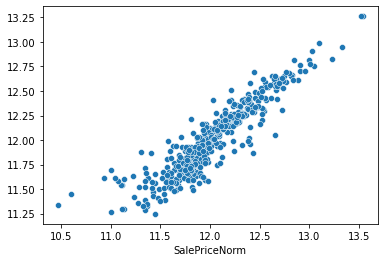

In [431]:
sns.scatterplot(x=y_test,y=linreg_pred) 

In [432]:
from sklearn.metrics import r2_score

In [433]:
r2_score(y_test,linreg_pred) #this isn't any better than the overall quality score alone. seems like overall quality likely takes into account all of the numeric variables


0.8301685054367834

array([[<AxesSubplot:title={'center':'SalePriceNorm'}>]], dtype=object)

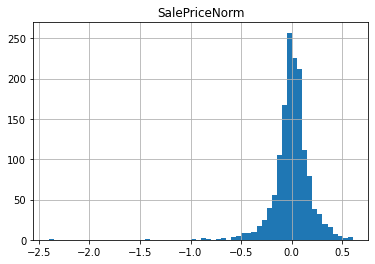

In [434]:
#calculate residuals for the full dataset
temp_resid = pca_linreg.predict(train_pca)
y = df_train['SalePriceNorm']
lin_resid = pd.DataFrame(y-temp_resid)
lin_resid.hist(bins=60) #residuals are normally distributed

In [436]:
lin_resid.describe() 

,SalePriceNorm
count,1460.000000
mean,0.003577
std,0.180427
min,-2.402545
25%,-0.067650
50%,0.006745
75%,0.092706
max,0.604497


In [437]:
lin_resid['StDev']=lin_resid['SalePriceNorm'].apply(lambda x: x/np.std(lin_resid['SalePriceNorm']))

In [438]:
lin_resid['StDev']

Id
1      -0.092249
2       0.526353
3       0.235999
4      -0.629482
5      -0.978205
          ...   
1456   -0.305819
1457   -0.307130
1458    2.563882
1459    1.022266
1460   -0.217486
Name: StDev, Length: 1460, dtype: float64

In [439]:
from sklearn.cross_decomposition import PLSRegression

In [440]:
plsr = PLSRegression(n_components=4)

In [441]:
#Check regression on PC's alone
X = train_pca
y = df_train['SalePriceNorm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [442]:
plsr.fit(X_train,y_train)

PLSRegression(n_components=4)

In [443]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [444]:
plsr_pred = plsr.predict(X_test)
# Calculate scores
print(r2_score(y_test, plsr_pred))
print(mean_squared_error(y_test, plsr_pred))
print(mean_absolute_error(y_test, plsr_pred))

0.8301685054367833
0.028944616548840785
0.1184140034250289


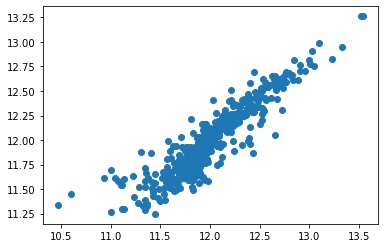

In [445]:
plt.scatter(y_test,plsr_pred) #about the same as the PCA regression. Seems like these have less extreme outliers compared to random forest

In [446]:
from sklearn.ensemble import RandomForestRegressor

In [447]:
rfr = RandomForestRegressor(n_estimators=150)

In [448]:
#Check regression on PC's alone
X = train_pca
y = df_train['SalePriceNorm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

In [449]:
rfr_pred = rfr.predict(X_test)

In [450]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot:xlabel='SalePriceNorm'>

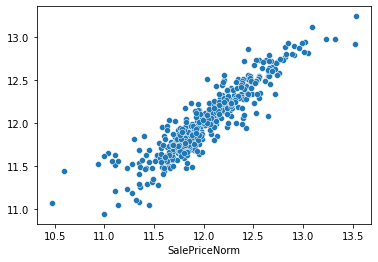

In [451]:
sns.scatterplot(x=y_test,y=rfr_pred) 

In [452]:
r2_score(y_test,rfr_pred) #only moderately better, increasing estimators has minimal impact

0.8408393679682309

In [453]:
train_num.drop('LotFrontage_Pred',axis=1,inplace=True)

In [454]:
#Check regression on raw scaled data
X = train_num
y = df_train['SalePriceNorm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150)

0.8726418091550827


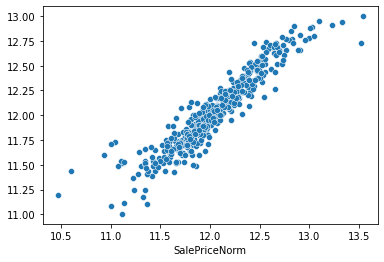

In [455]:
rfr_pred = rfr.predict(X_test)
sns.scatterplot(x=y_test,y=rfr_pred) 
print(r2_score(y_test,rfr_pred)) #a little better with the full dataset

In [460]:
train_obj.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
YrSold           0
MoSold           0
dtype: int64

In [457]:
#print(train_obj['Alley'].unique())
#print(train_obj['BsmtQual'].unique())
#print(train_obj['BsmtCond'].unique())
#print(train_obj['BsmtExposure'].unique())
#print(train_obj['BsmtFinType1'].unique())
#print(train_obj['BsmtFinType2'].unique())
#print(train_obj['Electrical'].unique())
#print(train_obj['FireplaceQu'].unique())
#print(train_obj['GarageType'].unique())
#print(train_obj['GarageFinish'].unique())
#print(train_obj['GarageQual'].unique())
#print(train_obj['GarageCond'].unique())
#print(train_obj['PoolQC'].unique())
print(train_obj['Fence'].unique())
print(train_obj['MiscFeature'].unique())

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [458]:
train_obj['MasVnrType'].value_counts() #impute with most common

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [459]:
#Imputing missing categorical data
train_obj['Alley'].fillna('None',inplace=True) #Some houses do not have an alley
train_obj['BsmtQual'].fillna('None',inplace=True) #Some houses do not have a basement. Same number of nans for qual and cond
train_obj['BsmtCond'].fillna('None',inplace=True)
train_obj['BsmtExposure'].fillna('None',inplace=True)
train_obj['BsmtFinType1'].fillna('None',inplace=True)
train_obj['BsmtFinType2'].fillna('None',inplace=True)
train_obj['Electrical'].fillna('SBrkr',inplace=True) #Used most common type
train_obj['FireplaceQu'].fillna('None',inplace=True) #Some houses do not have fireplace
train_obj['GarageType'].fillna('None',inplace=True) #Some houses do not have a garage
train_obj['GarageFinish'].fillna('None',inplace=True)
train_obj['GarageQual'].fillna('None',inplace=True)
train_obj['GarageCond'].fillna('None',inplace=True)
train_obj['MasVnrType'].fillna('None',inplace=True) #Misc Feature maybe should be dropped
train_obj['PoolQC'].fillna('None',inplace=True) #Most houses do not have a pool
train_obj['Fence'].fillna('None',inplace=True) #Many houses do not have a fence
train_obj['MiscFeature'].fillna('None',inplace=True) #Misc Feature maybe should be dropped

In [461]:
train_obj.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
YrSold           0
MoSold           0
dtype: int64

In [462]:
#Idea for tomorrow, check predicted values from linear model and find outliers, convert outliers to 0,1 for above
#and below expected value. Check logistic regresssion of categorical variables against it to determine which are
#important

In [463]:
X = pd.get_dummies(train_obj['GarageCond'])
y = lin_resid
z = pd.merge(X,y,left_index=True,right_index=True)
z.corr()

,Ex,Fa,Gd,None,Po,TA,SalePriceNorm,StDev
Ex,1.000000,-0.005804,-0.002917,-0.008976,-0.002571,-0.116508,0.009320,0.009320
Fa,-0.005804,1.000000,-0.012343,-0.037983,-0.010878,-0.492999,-0.048945,-0.048945
Gd,-0.002917,-0.012343,1.000000,-0.019087,-0.005466,-0.247746,0.012516,0.012516
None,-0.008976,-0.037983,-0.019087,1.000000,-0.016822,-0.762394,-0.061947,-0.061947
Po,-0.002571,-0.010878,-0.005466,-0.016822,1.000000,-0.218341,-0.011995,-0.011995
TA,-0.116508,-0.492999,-0.247746,-0.762394,-0.218341,1.000000,0.073329,0.073329
SalePriceNorm,0.009320,-0.048945,0.012516,-0.061947,-0.011995,0.073329,1.000000,1.000000
StDev,0.009320,-0.048945,0.012516,-0.061947,-0.011995,0.073329,1.000000,1.000000


In [464]:
X

,Ex,Fa,Gd,None,Po,TA
Id,,,,,,
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
...,...,...,...,...,...,...
1456,0,0,0,0,0,1
1457,0,0,0,0,0,1
1458,0,0,0,0,0,1


In [465]:
#Check regression on PC's alone


In [466]:
X = train_pca
y = df_train['SalePriceNorm']
pred_df = pd.DataFrame()
col_name = []
r2_cat = []
for i in train_obj.columns:
    temp_cat = pd.get_dummies(data=train_obj[i], drop_first=True)
    temp_df = pd.merge(X,temp_cat,left_index=True,right_index=True)
    X_train, X_test, y_train, y_test = train_test_split(temp_df, y, test_size=0.33, random_state=42)
    pca_lm = LinearRegression()
    pca_lm.fit(X_train,y_train)
    temp_pred = pca_lm.predict(X_test)
    col_name.append(i)
    r2_cat.append(r2_score(y_test,temp_pred))

pred_df['categories']=col_name
pred_df['r2'] = r2_cat

In [467]:
pred_df

,categories,r2
0,MSZoning,0.852256
1,Street,0.836970
2,Alley,0.830203
3,LotShape,0.832863
4,LandContour,0.823454
5,Utilities,0.830221
6,LotConfig,0.829995
7,LandSlope,0.830356
8,Neighborhood,0.855879
9,Condition1,0.832005


In [470]:
X = train_pca
y = df_train['SalePriceNorm']
X_cat = train_obj[['MSZoning', 'Neighborhood','KitchenQual','Functional','YrSold','MoSold']]
temp_df = pd.merge(X,X_cat,left_index=True,right_index=True)
temp_df = pd.merge(temp_df,y,left_index=True,right_index=True)
temp_df

,V1,V2,V3,V4,MSZoning,Neighborhood,KitchenQual,Functional,YrSold,MoSold,SalePriceNorm
Id,,,,,,,,,,,
1,1.425998,0.572432,-1.657209,-1.883677,RL,CollgCr,Gd,Typ,2008,2,12.247694
2,0.015605,-1.157684,0.943348,-0.039478,RL,Veenker,TA,Typ,2007,5,12.109011
3,1.607697,0.333589,-1.316187,-1.433611,RL,CollgCr,Gd,Typ,2008,9,12.317167
4,-0.343780,0.957321,0.563085,-0.183344,RL,Crawfor,Gd,Typ,2006,2,11.849398
5,4.346807,1.174418,-0.520681,-1.495733,RL,NoRidge,Gd,Typ,2008,12,12.429216
...,...,...,...,...,...,...,...,...,...,...,...
1456,0.725758,1.435418,-1.787139,0.438932,RL,Gilbert,TA,Typ,2007,8,12.072541
1457,2.463299,-1.671144,1.708338,0.307233,RL,NWAmes,TA,Min1,2010,2,12.254863
1458,0.488743,3.345129,1.474290,0.102162,RL,Crawfor,Gd,Typ,2010,5,12.493130


In [471]:
from statsmodels.formula.api import ols

fit = ols('SalePriceNorm ~ C(Neighborhood) + C(MSZoning) + C(KitchenQual) + C(Functional) + C(YrSold) + C(MoSold) + V1 + V2 + V3 + V4', data=temp_df).fit() 

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePriceNorm   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:53:54   Log-Likelihood:                 716.04
No. Observations:                1460   AIC:                            -1318.
Df Residuals:                    1403   BIC:                            -1017.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     11.5169      0.085    135.882      0.000      11.351      11.683
C(Neighborhood)[T.Blueste]    -0.0737      0.116     -0.634      0.526      -0.302       0.154
C(Neighborhood)[T.BrDale]     -0.2101      0.059     -3.568      0.000      -0.326      -0.095
C(Neighborhood)[T.BrkSide]     0.0298      0.047      0.630      0.529      -0.063       0.123
C(Neighborhood)[T.ClearCr]     0.0791      0.051      1.566      0.118      -0.020       0.178
C(Neighborhood)[T.CollgCr]     0.0075      0.039      0.189      0.850      -0.070       0.085
C(Neighborhood)[T.Crawfor]     0.2149      0.046      4.689      0.000       0.125       0.305
C(Neighborhood)[T.Edwards]    -0.1152      0.043     -2.682      0.007      -0.200      -0.031
C(Neighborhood)[T.Gilbert]    -0.0079      0.042     -0.189      0.850      -0.090       0.074
C(Neighborhood)[T.IDOTRR]     -0.0333      0.055     -0.603      0.547      -0.142       0.075
C(Neighborhood)[T.MeadowV]    -0.2254      0.059     -3.846      0.000      -0.340      -0.110
C(Neighborhood)[T.Mitchel]    -0.0485      0.045     -1.090      0.276      -0.136       0.039
C(Neighborhood)[T.NAmes]      -0.0158      0.041     -0.383      0.701      -0.097       0.065
C(Neighborhood)[T.NPkVill]    -0.0731      0.064     -1.139      0.255      -0.199       0.053
C(Neighborhood)[T.NWAmes]     -0.0132      0.043     -0.307      0.759      -0.097       0.071
C(Neighborhood)[T.NoRidge]     0.1191      0.046      2.607      0.009       0.029       0.209
C(Neighborhood)[T.NridgHt]     0.1070      0.042      2.548      0.011       0.025       0.189
C(Neighborhood)[T.OldTown]    -0.0431      0.048     -0.905      0.365      -0.136       0.050
C(Neighborhood)[T.SWISU]       0.0482      0.052      0.918      0.359      -0.055       0.151
C(Neighborhood)[T.Sawyer]     -0.0446      0.044     -1.019      0.309      -0.131       0.041
C(Neighborhood)[T.SawyerW]    -0.0353      0.043     -0.819      0.413      -0.120       0.049
C(Neighborhood)[T.Somerst]     0.0699      0.050      1.392      0.164      -0.029       0.168
C(Neighborhood)[T.StoneBr]     0.1972      0.049      4.044      0.000       0.102       0.293
C(Neighborhood)[T.Timber]      0.0338      0.046      0.739      0.460      -0.056       0.124
C(Neighborhood)[T.Veenker]     0.1431      0.060      2.372      0.018       0.025       0.262
C(MSZoning)[T.FV]              0.4466      0.070      6.355      0.000       0.309       0.584
C(MSZoning)[T.RH]              0.4287      0.071      6.049      0.000       0.290       0.568
C(MSZoning)[T.RL]              0.4851      0.058      8.295      0.000       0.370       0.600
C(MSZoning)[T.RM]              0.4497      0.055      8.214      0.000       0.342       0.557
C(KitchenQual)[T.Fa]          -0.2544      

In [476]:
rfr = RandomForestRegressor(n_estimators=150)

X = train_pca
y = df_train['SalePriceNorm']
pred_rfr = pd.DataFrame()
col_name = []
r2_cat = []
for i in train_obj.columns:
    temp_cat = pd.get_dummies(data=train_obj[i], drop_first=True)
    temp_cat=temp_cat+1
    temp_df = pd.merge(X,temp_cat,left_index=True,right_index=True)
    X_train, X_test, y_train, y_test = train_test_split(temp_df, y, test_size=0.33, random_state=42)
    rfr = RandomForestRegressor()
    rfr.fit(X_train,y_train)
    rfr_pred = rfr.predict(X_test)
    col_name.append(i)
    r2_cat.append(r2_score(y_test,rfr_pred))

pred_rfr['categories']=col_name
pred_rfr['r2'] = r2_cat

In [477]:
pred_rfr

,categories,r2
0,MSZoning,0.841574
1,Street,0.838529
2,Alley,0.841094
3,LotShape,0.841694
4,LandContour,0.841494
5,Utilities,0.837355
6,LotConfig,0.841145
7,LandSlope,0.844094
8,Neighborhood,0.854686
9,Condition1,0.841979
